## Loading and plotting of real _C. elegans_ datasets.
---
*Last updated: 17 June 2024*

We have obtained "whole brain" calcium imaging data from a few open source datasets. 

 ______________________________________________________________________________________________________________________________________________________________________
|Paper link              |Database link                |Data files                 |Num. worms |Mean num. neurons (labeled, recorded) |Num. labeled neurons (min, max) |
|------------------------|-----------------------------|---------------------------|-----------|--------------------------------------|--------------------------------|
|(unpublished data)      |chemosensory-data.worm.world |`2022*_herm_*.zip`         |      22   |             (187, 187)               |          (185, 189)            |
|tinyurl.com/ALin2023    |tinyurl.com/dropboxLin2023   |`run*_prfrd_data*.mat`     |     577   |               (8, 8)                 |             (1, 22)            |
|tinyurl.com/Leifer2023  |tinyurl.com/driveLeifer2023  |`exported_data.tar.gz`     |     108   |              (64, 68)                |            (19, 98)           |
|tinyurl.com/Flavell2023 |wormwideweb.org              |`YYYY-MM-DD-*.json/h5`     |      42   |              (88, 136)               |            (64, 115)           |
|tinyurl.com/UDag2023    |tinyurl.com/githubDag2023    |`data/swf702_with_id/*.h5` |       7   |             (100, 143)               |            (87, 110)           |
|tinyurl.com/Uzel2022    |osf.io/3vkxn/                |`Uzel_WT.mat`              |       6   |              (50, 138)               |            (46, 58)            |
|tinyurl.com/Yemini2021  |zenodo.org/records/3906530   |`*_Activity_OH*.mat`       |      49   |             (110, 125)               |            (33, 179)           |
|tinyurl.com/Kaplan2020a |osf.io/9nfhz/                |`Neuron2019_Data_*.mat`    |      19   |              (36, 114)               |            (23, 51)            |
|tinyurl.com/Skora2018   |osf.io/za3gt/                |`WT_*.mat`                 |      12   |              (46, 129)               |            (39, 55)            |
|tinyurl.com/Nichols2017 |osf.io/kbf38/                |`*let.mat`                 |      44   |              (34, 108)               |            (23, 43)            |
|tinyurl.com/Kato2015    |osf.io/2395t/                |`WT_*Stim.mat`             |      12   |              (42, 127)               |            (31, 51)            |
|________________________|_____________________________|___________________________|___________|______________________________________|________________________________|

### What's the distinction between "whole-brain" and "whole-nervous system" recordings? 

The nervous system of the _C. elegans_ hermaphrodite is composed of 300 neurons that are organized in several 
ganglia in the head and tail and into a spinal cord-like ventral nerve cord [1]. The majority of the neurons 
is located in the head, where they are organised in a number of ganglia surrounding the pharynx, forming the 
brain of the animal [2].

References:
- [1] http://www.wormbook.org/chapters/www_specnervsys.2/neurogenesis.html<br>
- [2] https://www.sfu.ca/biology/faculty/hutter/hutterlab/research/Ce_nervous_system.html<br>

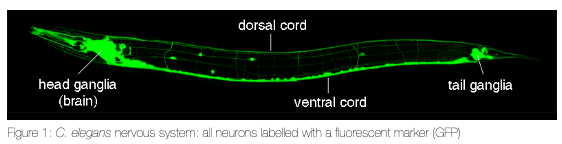

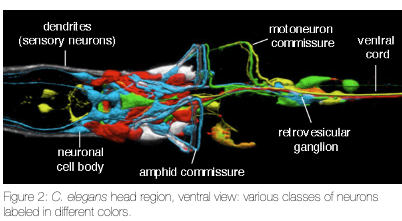

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import init_random_seeds
from visualize._utils import plot_worm_data
from data._utils import pick_worm, load_dataset

# Initialize the random seeds
init_random_seeds(42)

Loading from /net/vast-storage/scratch/vast/yanglab/qsimeon/worm-graph/data/raw/neuron_master_sheet.csv.

CUDA device found.
	 GPU: NVIDIA A100 80GB PCIe


12 ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11']

Avg num. neurons ID'd/recorded : 42/127
Range num. ID'd neurons : (31, 51)
Range len. calcium data : (2161, 3244)


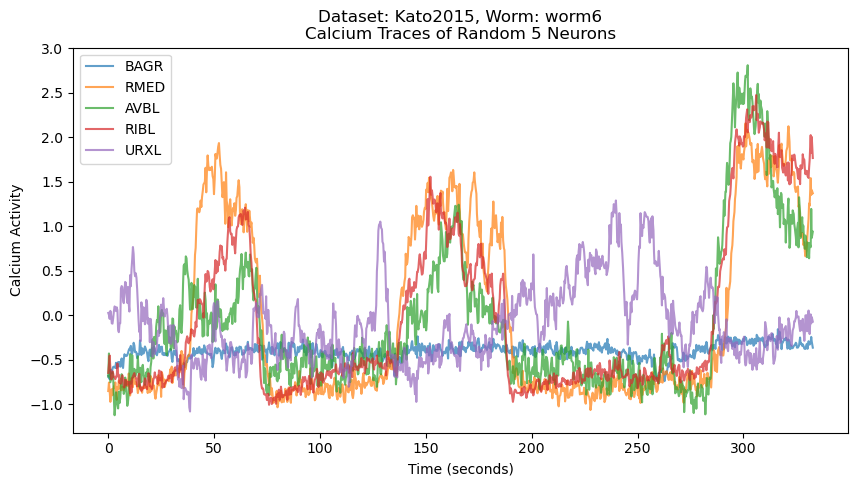

In [2]:
# @title Kato et al., Cell 2015, _Global Brain Dynamics Embed the Motor Command Sequence of Caenorhabditis elegans_
# @markdown Source: https://osf.io/2395t/

# load the dataset
dataset_name = "Kato2015"
Kato2015 = load_dataset(dataset_name)
print(len(Kato2015), list(Kato2015.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Kato2015.keys()):
    single_worm_dataset = pick_worm(Kato2015, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Kato2015)
    named_avg += named_neurons / len(Kato2015)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Kato2015.keys()))
single_worm_dataset = pick_worm(Kato2015, worm)

# plot the calcium activity for a few neurons
plot_worm_data(single_worm_dataset, smooth=False)


# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Kato2015)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Kato2015, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

44 ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43']

Avg num. neurons ID'd/recorded : 34/108
Range num. ID'd neurons : (23, 43)
Range len. calcium data : (3242, 3244)


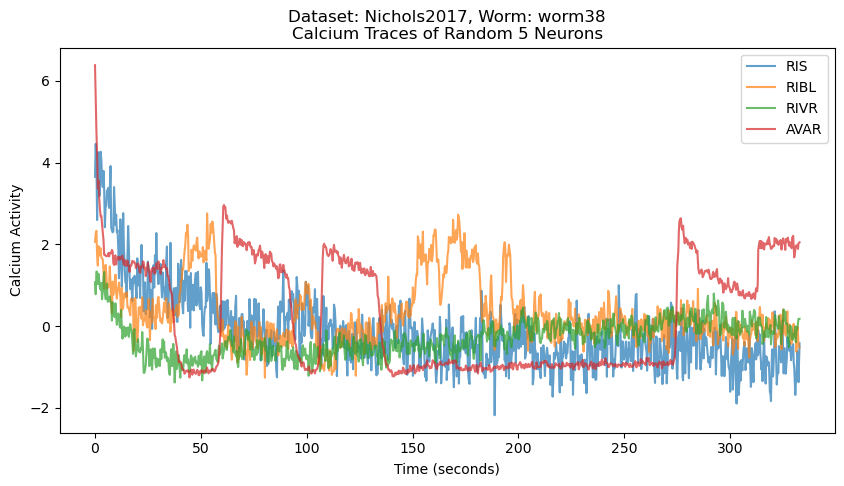

In [3]:
# @title Nichols et al., Science 2017, _A global brain state underlies C. elegans sleep behavior_
# @markdown Source: https://osf.io/kbf38/

# load the dataset
dataset_name = "Nichols2017"
Nichols2017 = load_dataset(dataset_name)
print(len(Nichols2017), list(Nichols2017.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Nichols2017.keys()):
    single_worm_dataset = pick_worm(Nichols2017, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Nichols2017)
    named_avg += named_neurons / len(Nichols2017)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Nichols2017.keys()))
single_worm_dataset = pick_worm(Nichols2017, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Nichols2017)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Nichols2017, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

12 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11'])

Avg num. neurons ID'd/recorded : 46/129
Range num. ID'd neurons : (39, 55)
Range len. calcium data : (3243, 3244)


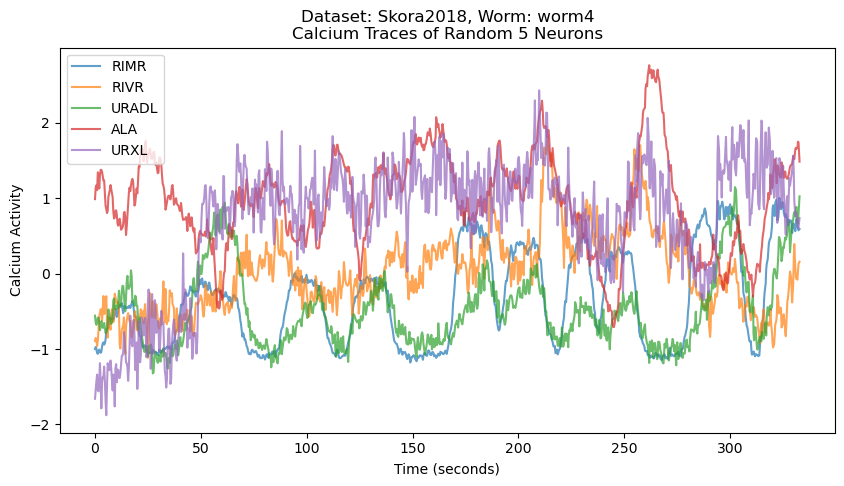

In [4]:
# @title Skora et al., Cell Reports 2018, _Energy Scarcity Promotes a Brain-wide Sleep State Modulated by Insulin Signaling in C. elegans_
# @markdown Source: https://osf.io/za3gt/

# load the dataset
dataset_name = "Skora2018"
Skora2018 = load_dataset(dataset_name)
print(len(Skora2018), Skora2018.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Skora2018.keys()):
    single_worm_dataset = pick_worm(Skora2018, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Skora2018)
    named_avg += named_neurons / len(Skora2018)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Skora2018.keys()))
single_worm_dataset = pick_worm(Skora2018, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Skora2018)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Skora2018, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()

# ### DEBUG ###

19 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18'])

Avg num. neurons ID'd/recorded : 36/114
Range num. ID'd neurons : (23, 51)
Range len. calcium data : (5405, 5406)


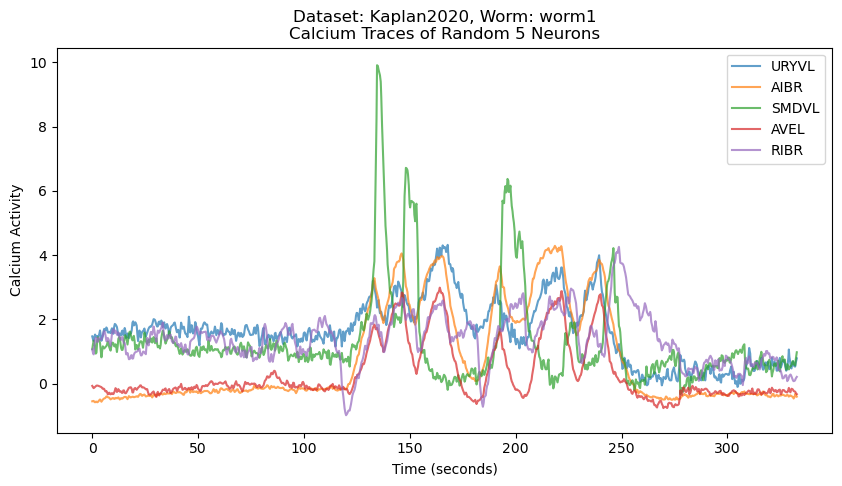

In [5]:
# @title Kaplan et al., Neuron 2020, _Nested Neuronal Dynamics Orchestrate a Behavioral Hierarchy across Timescales_
# @markdown Source: https://osf.io/9nfhz/

# load the dataset
dataset_name = "Kaplan2020"
Kaplan2020 = load_dataset(dataset_name)
print(len(Kaplan2020), Kaplan2020.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Kaplan2020.keys()):
    single_worm_dataset = pick_worm(Kaplan2020, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Kaplan2020)
    named_avg += named_neurons / len(Kaplan2020)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Kaplan2020.keys()))
single_worm_dataset = pick_worm(Kaplan2020, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Kaplan2020)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Kaplan2020, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

49 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48'])

Avg num. neurons ID'd/recorded : 110/125
Range num. ID'd neurons : (33, 179)
Range len. calcium data : (694, 717)


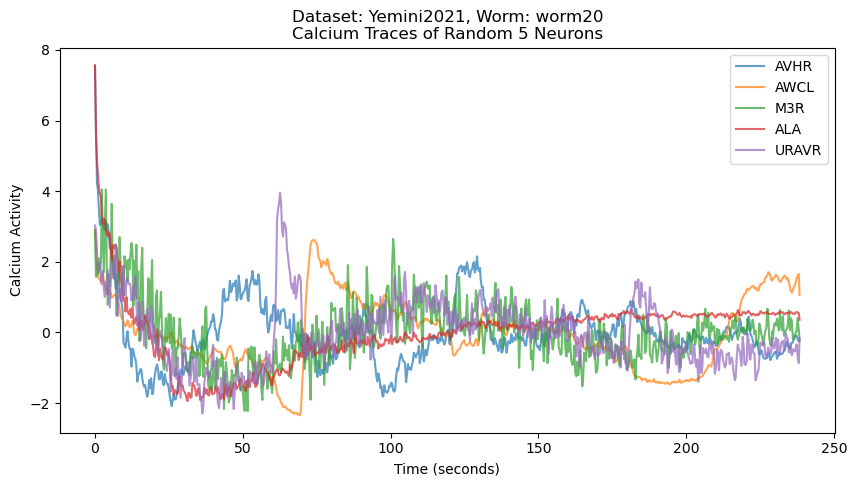

In [6]:
# @title Yemini et al., Cell CurrBio 2022, _NeuroPAL: A Multicolor Atlas for Whole-Brain Neuronal Identification in C. elegans_
# @markdown Source: https://zenodo.org/records/3906530

# load the dataset
dataset_name = "Yemini2021"
Yemini2021 = load_dataset(dataset_name)
print(len(Yemini2021), Yemini2021.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Yemini2021.keys()):
    single_worm_dataset = pick_worm(Yemini2021, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Yemini2021)
    named_avg += named_neurons / len(Yemini2021)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Yemini2021.keys()))
single_worm_dataset = pick_worm(Yemini2021, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Yemini2021)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Yemini2021, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

6 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5'])

Avg num. neuron ID'd/recorded : 50/138
Range num. ID'd neurons : (46, 58)
Range len. calcium data : (3242, 3242)
Avg num. ID'd : 50/138


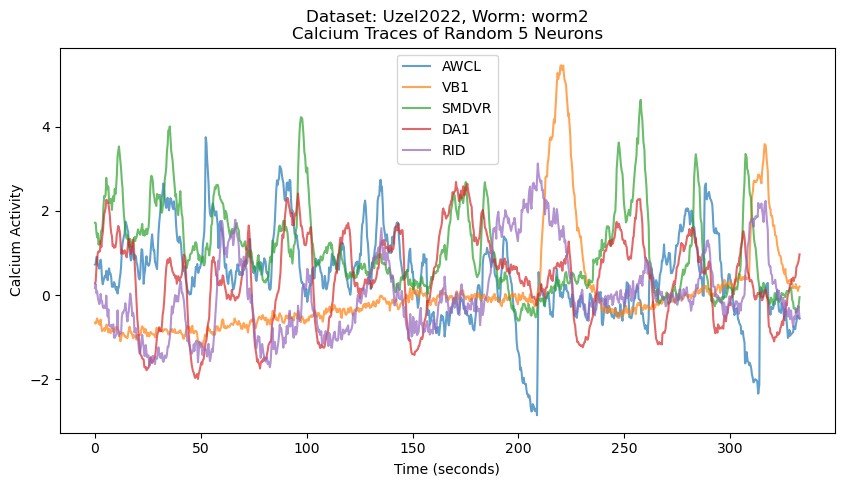

In [7]:
# @title Uzel et al., Cell CurrBio 2022, _A set of hub neurons and non-local connectivity features support global brain dynamics in C. elegans_
# @markdown Source: https://osf.io/3vkxn/

# load the dataset
dataset_name = "Uzel2022"
Uzel2022 = load_dataset(dataset_name)
print(len(Uzel2022), Uzel2022.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Uzel2022.keys()):
    single_worm_dataset = pick_worm(Uzel2022, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Uzel2022)
    named_avg += named_neurons / len(Uzel2022)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neuron ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")
print(f"Avg num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Uzel2022.keys()))
single_worm_dataset = pick_worm(Uzel2022, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Uzel2022)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Uzel2022, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

7 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6'])

Avg num. neurons ID'd/recorded : 100/141
Range num. ID'd neurons : (86, 110)
Range len. calcium data : (1443, 1445)


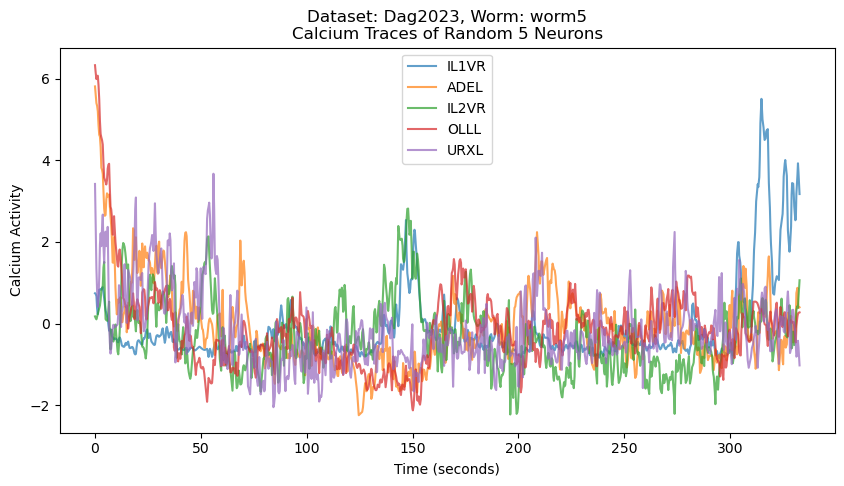

In [8]:
# @title Dag et al., Cell 2023. “_Dissecting the Functional Organization of the C. Elegans Serotonergic System at Whole-Brain Scale_
# @markdown Source: https://github.com/flavell-lab/NSM_5HTR_analysis/tree/main/data/swf702_with_id

# load the dataset
dataset_name = "Dag2023"
Dag2023 = load_dataset(dataset_name)
print(len(Dag2023), Dag2023.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Dag2023.keys()):
    single_worm_dataset = pick_worm(Dag2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Dag2023)
    named_avg += named_neurons / len(Dag2023)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Dag2023.keys()))
single_worm_dataset = pick_worm(Dag2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Dag2023)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Dag2023, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     if named_mask.sum() == 0:  # some worms in Dag2023 have no named neurons
#         continue

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

40 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39'])

Avg num. neurons ID'd/recorded : 88/136
Range num. ID'd neurons : (64, 115)
Range len. calcium data : (2890, 2917)


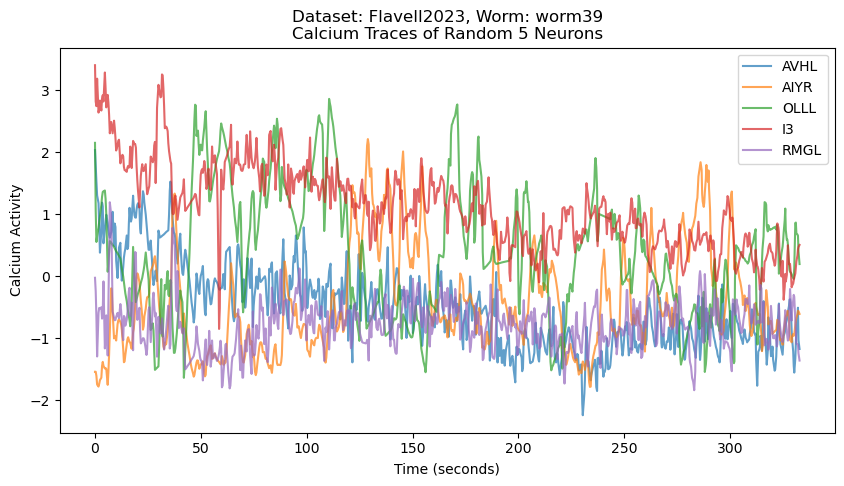

In [9]:
# @title Atanas & Kim et al., Cell 2023, _Brain-Wide Representations of Behavior Spanning Multiple Timescales and States in C. Elegans_
# @markdown Source: wormwideweb.org

# load the dataset
dataset_name = "Flavell2023"
Flavell2023 = load_dataset(dataset_name)
print(len(Flavell2023), Flavell2023.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Flavell2023.keys()):
    single_worm_dataset = pick_worm(Flavell2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Flavell2023)
    named_avg += named_neurons / len(Flavell2023)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Flavell2023.keys()))
single_worm_dataset2 = pick_worm(Flavell2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Flavell2023)):  # no idea why worm0 does not exist for Flavell2023
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Flavell2023, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

110 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48', 'worm49', 'worm50', 'worm51', 'worm52', 'worm53', 'worm54', 'worm55', 'worm56', 'worm57', 'worm58', 'worm59', 'worm60', 'worm61', 'worm62', 'worm63', 'worm64', 'worm65', 'worm66', 'worm67', 'worm68', 'worm69', 'worm70', 'worm71', 'worm72', 'worm73', 'worm74', 'worm75', 'worm76', 'worm77', 'worm78', 'worm79', 'worm80', 'worm81', 'worm82', 'worm83', 'worm84', 'worm85', 'worm86', 'worm87', 'worm88', 'worm89', 'worm90', 'worm91', 'worm92', 'worm93', 'worm94', 'worm95', 'worm96', 'worm97', 'worm98', 'worm

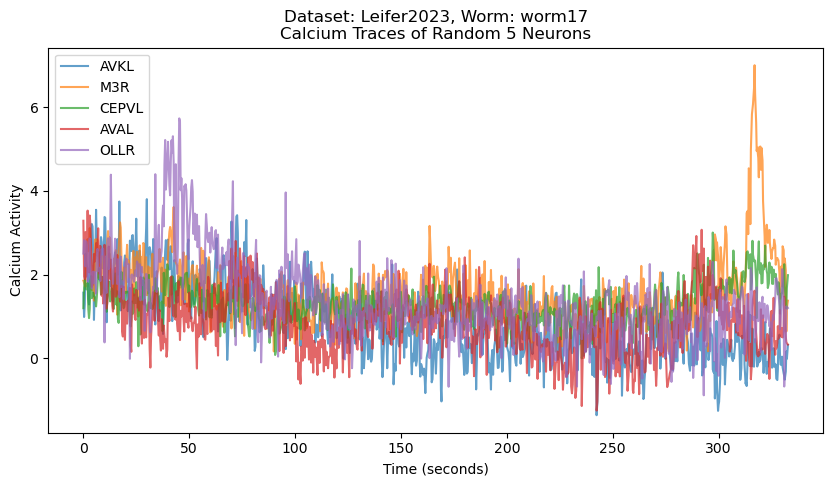

In [10]:
# @title Randi et al., Nature 2023. _Neural Signal Propagation Atlas of Caenorhabditis Elegans_
# @markdown Source: https://osf.io/e2syt/

# load the dataset
dataset_name = "Leifer2023"
Leifer2023 = load_dataset(dataset_name)
print(len(Leifer2023), Leifer2023.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Leifer2023.keys()):
    single_worm_dataset = pick_worm(Leifer2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Leifer2023)
    named_avg += named_neurons / len(Leifer2023)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Leifer2023.keys()))
single_worm_dataset = pick_worm(Leifer2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Leifer2023)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Leifer2023, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

577 dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48', 'worm49', 'worm50', 'worm51', 'worm52', 'worm53', 'worm54', 'worm55', 'worm56', 'worm57', 'worm58', 'worm59', 'worm60', 'worm61', 'worm62', 'worm63', 'worm64', 'worm65', 'worm66', 'worm67', 'worm68', 'worm69', 'worm70', 'worm71', 'worm72', 'worm73', 'worm74', 'worm75', 'worm76', 'worm77', 'worm78', 'worm79', 'worm80', 'worm81', 'worm82', 'worm83', 'worm84', 'worm85', 'worm86', 'worm87', 'worm88', 'worm89', 'worm90', 'worm91', 'worm92', 'worm93', 'worm94', 'worm95', 'worm96', 'worm97', 'worm98', 'worm

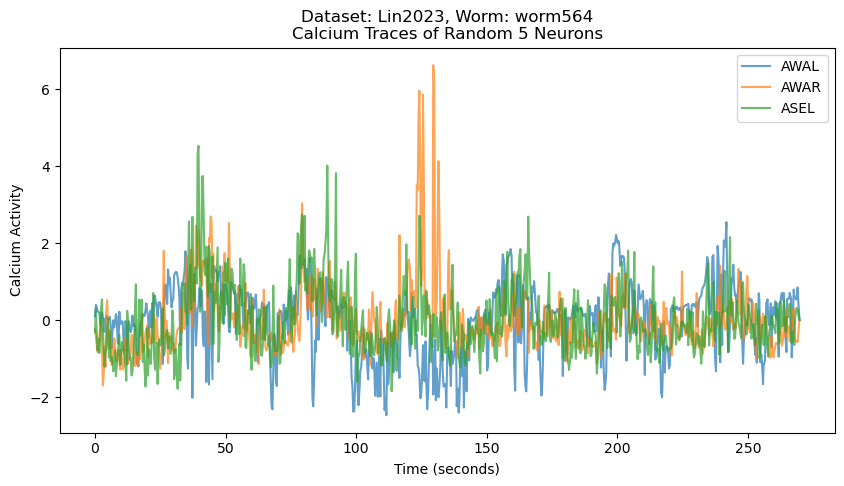

In [11]:
# @title Lin et al., Science Advances 2023, _Functional Imaging and Quantification of Multineuronal Olfactory Responses in C. Elegans_
# @markdown Source: https://www.dropbox.com/scl/fi/g6r1mg90n9o5gtm9he70x/raw_sensory_data_package.zip?rlkey=1n4lgipqghpr7s6bfw7sc9e11&dl=1

# load the dataset
dataset_name = "Lin2023"
Lin2023 = load_dataset(dataset_name)
print(len(Lin2023), Lin2023.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Lin2023.keys()):
    single_worm_dataset = pick_worm(Lin2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Lin2023)
    named_avg += named_neurons / len(Lin2023)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Lin2023.keys()))
single_worm_dataset = pick_worm(Lin2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Lin2023)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Lin2023, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###

22 ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21']

Avg num. neurons ID'd/recorded : 187/187
Range num. ID'd neurons : (185, 189)
Range len. calcium data : (5497, 5497)


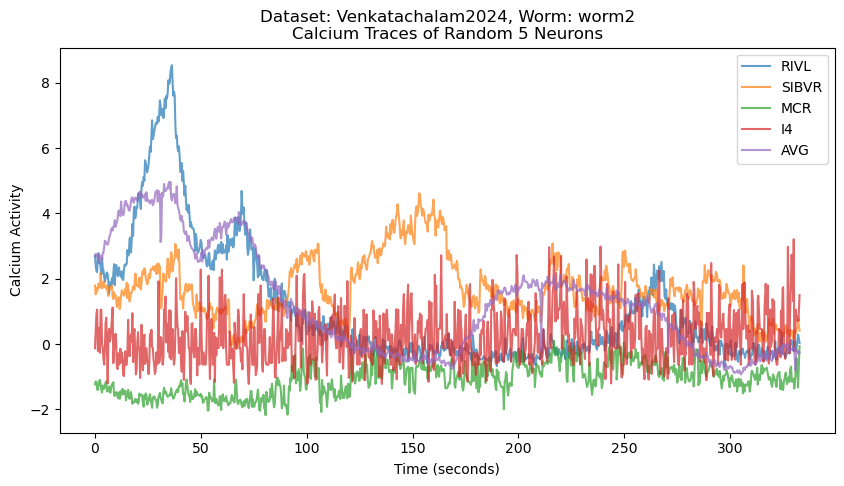

In [12]:
# @title Venkatachalam (2024). Email correspondence to Quilee Simeon from Vivek Venkatachalam "Re: Request for C. elegans neural data" on June 18, 2024
# @markdown Source: https://chemosensory-data.worm.world/

# load the dataset
dataset_name = "Venkatachalam2024"
Venkatachalam2024 = load_dataset(dataset_name)
print(len(Venkatachalam2024), list(Venkatachalam2024.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Venkatachalam2024.keys()):
    single_worm_dataset = pick_worm(Venkatachalam2024, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Venkatachalam2024)
    named_avg += named_neurons / len(Venkatachalam2024)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Venkatachalam2024.keys()))
single_worm_dataset = pick_worm(Venkatachalam2024, worm)

# plot the calcium activity for a few neurons
plot_worm_data(single_worm_dataset, smooth=False)

# ### DEBUG ###
# # Inspecting the first 100 timesteps of the original (raw) calcium traces for the first 3 worms
# for i in range(len(Venkatachalam2024)):
#     if i > 2:
#         break

#     worm = "worm" + str(i)

#     single_worm_dataset = pick_worm(Venkatachalam2024, worm)

#     named_mask, unknown_mask = (
#         single_worm_dataset["named_neurons_mask"],
#         single_worm_dataset["unknown_neurons_mask"],
#     )

#     named_og_calcium = single_worm_dataset["original_calcium_data"][:, named_mask]
#     og_time_vector = single_worm_dataset["original_time_in_seconds"].squeeze()

#     print(f"worm: {worm} \t data: {named_og_calcium.shape}")

#     plt.plot(og_time_vector[:100], named_og_calcium[:100])  # only the first 100 timesteps
#     plt.xlabel("time (s)")
#     plt.ylabel("z-score $\Delta F/F$")
#     plt.show()
# ### DEBUG ###